In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import sklearn

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/refs/heads/master/Automobile_insurance_fraud.csv')

In [3]:
df

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,...,?,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,...,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,...,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,...,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN



This Dataset contains 1000 rows and 40 columns.out of which 1 is target variable and remaining 39 are independent variables.

EDA(Exploratory Data Analysis)

In [4]:
df.shape

(1000, 40)

In [5]:
df.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', '_c39'],
      dtype='object')

In [6]:
df.columns.tolist()

['months_as_customer',
 'age',
 'policy_number',
 'policy_bind_date',
 'policy_state',
 'policy_csl',
 'policy_deductable',
 'policy_annual_premium',
 'umbrella_limit',
 'insured_zip',
 'insured_sex',
 'insured_education_level',
 'insured_occupation',
 'insured_hobbies',
 'insured_relationship',
 'capital-gains',
 'capital-loss',
 'incident_date',
 'incident_type',
 'collision_type',
 'incident_severity',
 'authorities_contacted',
 'incident_state',
 'incident_city',
 'incident_location',
 'incident_hour_of_the_day',
 'number_of_vehicles_involved',
 'property_damage',
 'bodily_injuries',
 'witnesses',
 'police_report_available',
 'total_claim_amount',
 'injury_claim',
 'property_claim',
 'vehicle_claim',
 'auto_make',
 'auto_model',
 'auto_year',
 'fraud_reported',
 '_c39']

In [7]:
df.dtypes

months_as_customer               int64
age                              int64
policy_number                    int64
policy_bind_date                object
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_date                   object
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_location               object
incident_hour_of_the_day 

check the null values

In [8]:
df.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [10]:
for i in df.columns:
    print(df[i].value_counts())
    print('\n')

194    8
128    7
254    7
140    7
210    7
      ..
390    1
411    1
453    1
448    1
17     1
Name: months_as_customer, Length: 391, dtype: int64


43    49
39    48
41    45
34    44
38    42
30    42
31    42
37    41
33    39
40    38
32    38
29    35
46    33
42    32
35    32
36    32
44    32
28    30
26    26
45    26
48    25
47    24
27    24
57    16
25    14
55    14
49    14
53    13
50    13
24    10
54    10
61    10
51     9
60     9
58     8
56     8
23     7
21     6
59     5
62     4
52     4
64     2
63     2
19     1
20     1
22     1
Name: age, dtype: int64


521585    1
687755    1
674485    1
223404    1
991480    1
         ..
563878    1
620855    1
583169    1
337677    1
556080    1
Name: policy_number, Length: 1000, dtype: int64


01-01-2006    3
28-04-1992    3
05-08-1992    3
14-12-1991    2
09-08-2004    2
             ..
03-06-2014    1
12-12-1998    1
18-02-1999    1
30-10-1997    1
11-11-1996    1
Name: policy_bind_date, Length: 951, dtype: int64

As we can see there is so many nan value present in this column so we can drop this column as it affect the model.

In [11]:
df.drop(['_c39'],axis=1,inplace=True)

<Axes: >

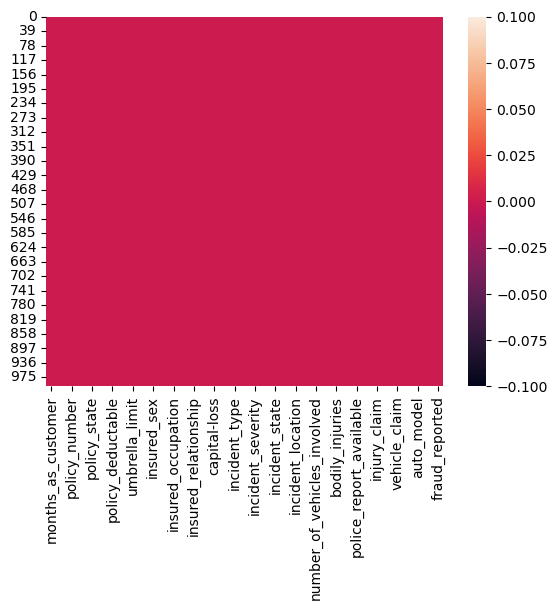

In [12]:
sns.heatmap(df.isnull())

As we can see visualy that terre is no null values present in this dataset

In [13]:
df.nunique().to_frame('number of unique values')

,number of unique values
months_as_customer,391
age,46
policy_number,1000
policy_bind_date,951
policy_state,3
policy_csl,3
policy_deductable,3
policy_annual_premium,991
umbrella_limit,11
insured_zip,995


Encoding Technique.

In [14]:
from sklearn.preprocessing import OrdinalEncoder
oe=OrdinalEncoder()
for i in df.columns:
    if df[i].dtypes=='object':
        df[i]=oe.fit_transform(df[i].values.reshape(-1,1))
        df

In [15]:
df

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,532.0,2.0,1.0,1000,1406.91,0,466132,...,2,2.0,71610,6510,13020,52080,10.0,1.0,2004,1.0
1,228,42,342868,821.0,1.0,1.0,2000,1197.22,5000000,468176,...,0,0.0,5070,780,780,3510,8.0,12.0,2007,1.0
2,134,29,687698,186.0,2.0,0.0,2000,1413.14,5000000,430632,...,3,1.0,34650,7700,3850,23100,4.0,30.0,2007,0.0
3,256,41,227811,766.0,0.0,1.0,2000,1415.74,6000000,608117,...,2,1.0,63400,6340,6340,50720,3.0,34.0,2014,1.0
4,228,44,367455,181.0,0.0,2.0,1000,1583.91,6000000,610706,...,1,1.0,6500,1300,650,4550,0.0,31.0,2009,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,487.0,2.0,2.0,1000,1310.80,0,431289,...,1,0.0,87200,17440,8720,61040,6.0,6.0,2006,0.0
996,285,41,186934,129.0,0.0,0.0,1000,1436.79,0,608177,...,3,0.0,108480,18080,18080,72320,13.0,28.0,2015,0.0
997,130,34,918516,509.0,2.0,1.0,500,1383.49,3000000,442797,...,3,2.0,67500,7500,7500,52500,11.0,19.0,1996,0.0
998,458,62,533940,573.0,0.0,2.0,2000,1356.92,5000000,441714,...,1,2.0,46980,5220,5220,36540,1.0,5.0,1998,0.0


Description of dataset(it gives the statistical summary of numerical columns)

In [16]:
df.describe()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,...,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,203.954000,38.948000,546238.648000,474.332000,1.01400,0.951000,1136.000000,1256.406150,1.101000e+06,501214.488000,...,1.487000,0.971000,52761.94000,7433.420000,7399.570000,37928.950000,6.546000,19.318000,2005.103000,0.247000
std,115.113174,9.140287,257063.005276,275.402851,0.83096,0.804516,611.864673,244.167395,2.297407e+06,71701.610941,...,1.111335,0.810442,26401.53319,4880.951853,4824.726179,18886.252893,4.034869,11.136107,6.015861,0.431483
min,0.000000,19.000000,100804.000000,0.000000,0.00000,0.000000,500.000000,433.330000,-1.000000e+06,430104.000000,...,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,0.000000,0.000000,1995.000000,0.000000
25%,115.750000,32.000000,335980.250000,233.750000,0.00000,0.000000,500.000000,1089.607500,0.000000e+00,448404.500000,...,1.000000,0.000000,41812.50000,4295.000000,4445.000000,30292.500000,3.000000,10.000000,2000.000000,0.000000
50%,199.500000,38.000000,533135.000000,472.500000,1.00000,1.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,...,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,7.000000,20.000000,2005.000000,0.000000
75%,276.250000,44.000000,759099.750000,713.250000,2.00000,2.000000,2000.000000,1415.695000,0.000000e+00,603251.000000,...,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,10.000000,29.000000,2010.000000,0.000000
max,479.000000,64.000000,999435.000000,950.000000,2.00000,2.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,...,3.000000,2.000000,114920.00000,21450.000000,23670.000000,79560.000000,13.000000,38.000000,2015.000000,1.000000


This is the Staststical information of the numerical columns.This summary of the dataset looks perfect.since there is no negative /invalid values present. here mean value is greater than Median so there is right skewness present in the dataset. and 75% and Max values are huge difference hence outliers are present in the dataset.

Checking the counts of Targets

In [17]:
df['fraud_reported'].value_counts()

0.0    753
1.0    247
Name: fraud_reported, dtype: int64

Data Visualization

0.0    753
1.0    247
Name: fraud_reported, dtype: int64


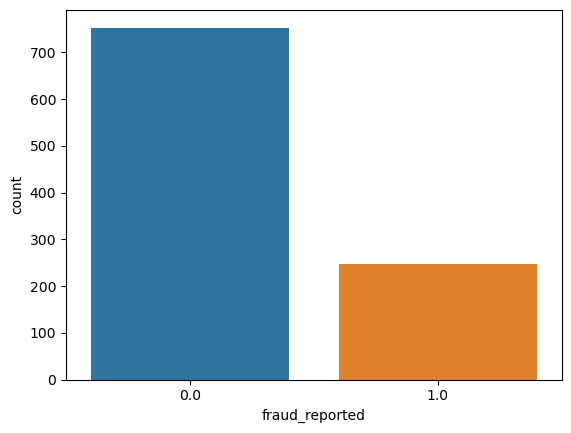

In [18]:
ux=sns.countplot(x='fraud_reported',data=df)
print(df['fraud_reported'].value_counts())
plt.show()

194    8
128    7
254    7
140    7
210    7
      ..
390    1
411    1
453    1
448    1
17     1
Name: months_as_customer, Length: 391, dtype: int64


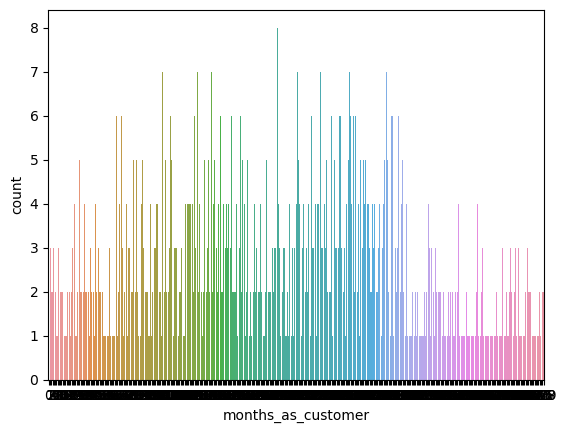

In [19]:
ux=sns.countplot(x='months_as_customer',data=df)
print(df['months_as_customer'].value_counts())
plt.show()

43    49
39    48
41    45
34    44
38    42
30    42
31    42
37    41
33    39
40    38
32    38
29    35
46    33
42    32
35    32
36    32
44    32
28    30
26    26
45    26
48    25
47    24
27    24
57    16
25    14
55    14
49    14
53    13
50    13
24    10
54    10
61    10
51     9
60     9
58     8
56     8
23     7
21     6
59     5
62     4
52     4
64     2
63     2
19     1
20     1
22     1
Name: age, dtype: int64


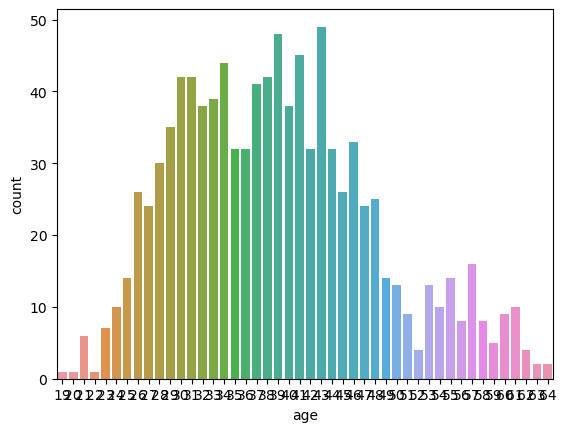

In [20]:
ux=sns.countplot(x='age',data=df)
print(df['age'].value_counts())
plt.show()

521585    1
687755    1
674485    1
223404    1
991480    1
         ..
563878    1
620855    1
583169    1
337677    1
556080    1
Name: policy_number, Length: 1000, dtype: int64


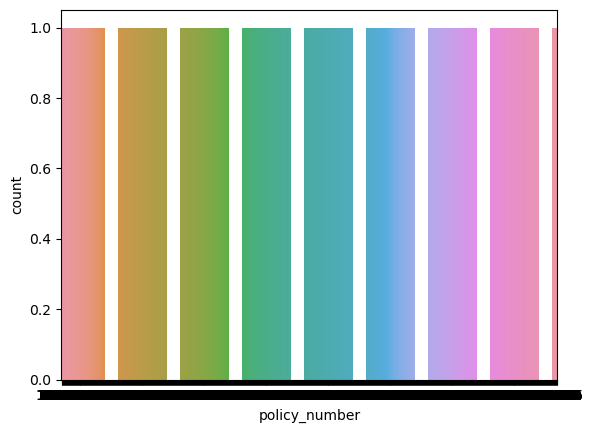

In [21]:
ux=sns.countplot(x='policy_number',data=df)
print(df['policy_number'].value_counts())
plt.show()

0.0      3
850.0    3
147.0    3
442.0    2
283.0    2
        ..
75.0     1
388.0    1
543.0    1
935.0    1
359.0    1
Name: policy_bind_date, Length: 951, dtype: int64


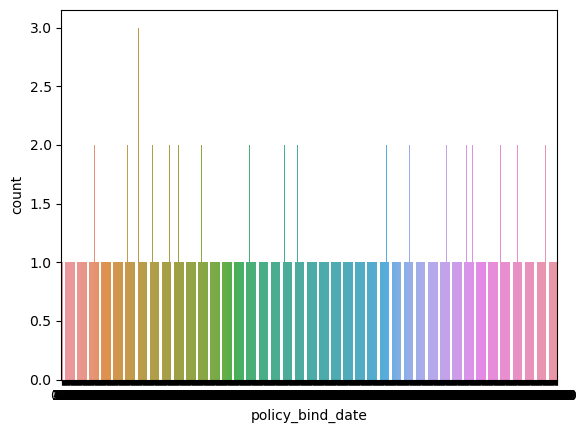

In [22]:
ux=sns.countplot(x='policy_bind_date',data=df)
print(df['policy_bind_date'].value_counts())
plt.show()

2.0    352
0.0    338
1.0    310
Name: policy_state, dtype: int64


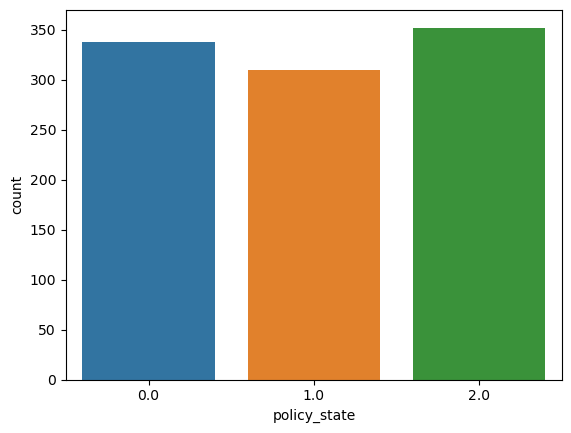

In [23]:
ux=sns.countplot(x='policy_state',data=df)
print(df['policy_state'].value_counts())
plt.show()

1.0    351
0.0    349
2.0    300
Name: policy_csl, dtype: int64


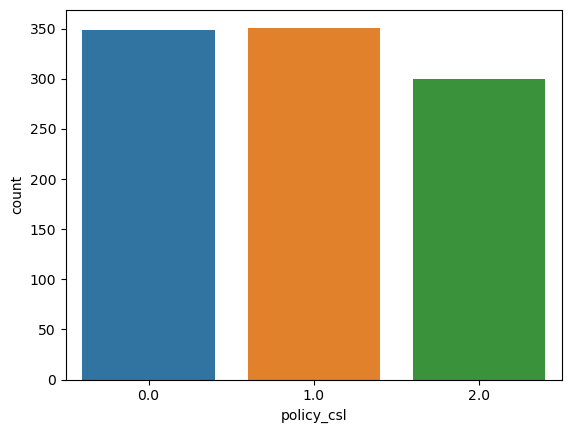

In [24]:
ux=sns.countplot(x='policy_csl',data=df)
print(df['policy_csl'].value_counts())
plt.show()

1000    351
500     342
2000    307
Name: policy_deductable, dtype: int64


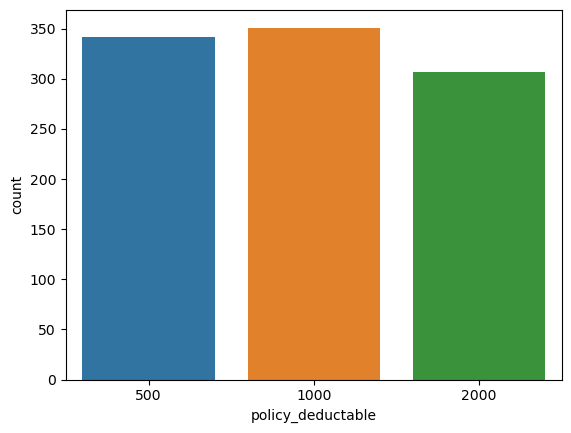

In [25]:
ux=sns.countplot(x='policy_deductable',data=df)
print(df['policy_deductable'].value_counts())
plt.show()

1558.29    2
1215.36    2
1362.87    2
1073.83    2
1389.13    2
          ..
1085.03    1
1437.33    1
988.29     1
1238.89    1
766.19     1
Name: policy_annual_premium, Length: 991, dtype: int64


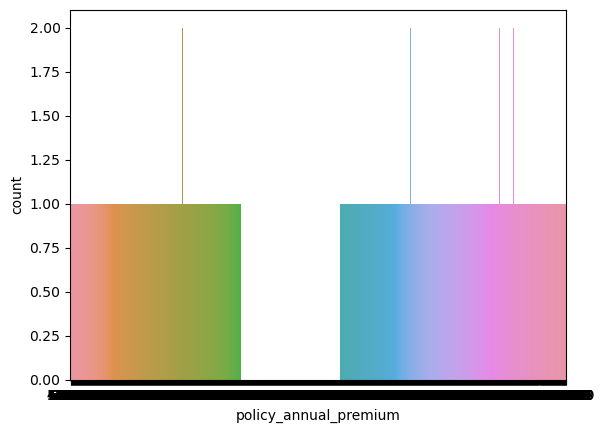

In [26]:
ux=sns.countplot(x='policy_annual_premium',data=df)
print(df['policy_annual_premium'].value_counts())
plt.show()

 0           798
 6000000      57
 5000000      46
 4000000      39
 7000000      29
 3000000      12
 8000000       8
 9000000       5
 2000000       3
 10000000      2
-1000000       1
Name: umbrella_limit, dtype: int64


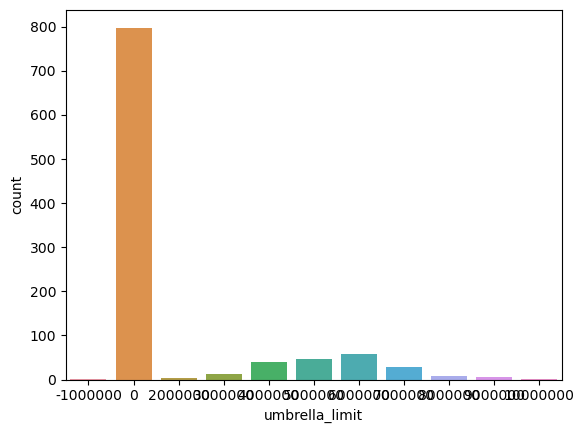

In [27]:
ux=sns.countplot(x='umbrella_limit',data=df)
print(df['umbrella_limit'].value_counts())
plt.show()

1    258
2    250
0    249
3    243
Name: witnesses, dtype: int64


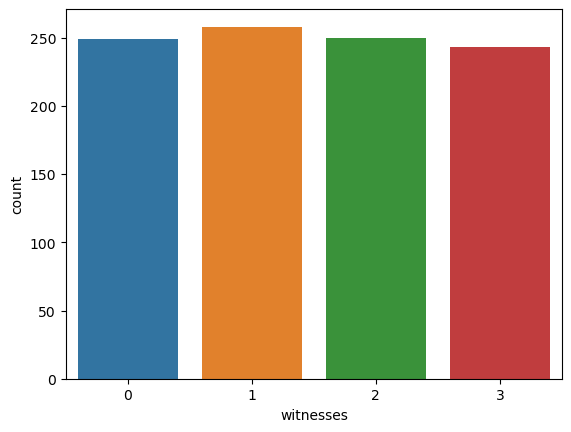

In [28]:
ux=sns.countplot(x='witnesses',data=df)
print(df['witnesses'].value_counts())
plt.show()

0.0    343
1.0    343
2.0    314
Name: police_report_available, dtype: int64


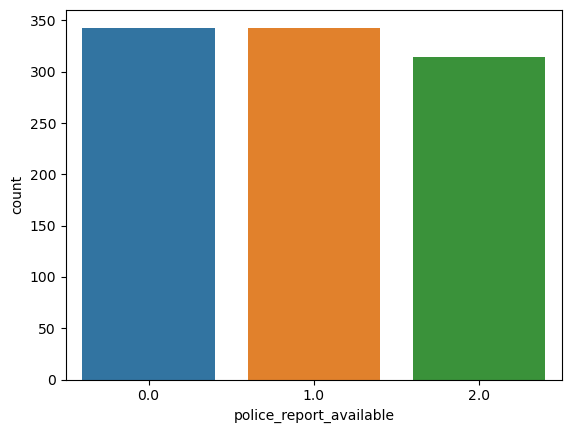

In [29]:
ux=sns.countplot(x='police_report_available',data=df)
print(df['police_report_available'].value_counts())
plt.show()

59400    5
2640     4
70400    4
4320     4
44200    4
        ..
65250    1
87100    1
6240     1
66600    1
67500    1
Name: total_claim_amount, Length: 763, dtype: int64


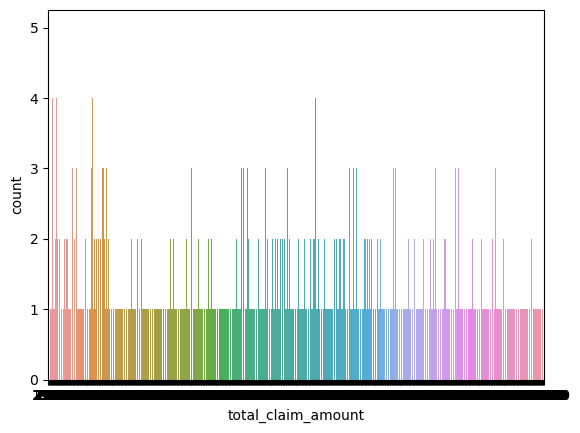

In [30]:
ux=sns.countplot(x='total_claim_amount',data=df)
print(df['total_claim_amount'].value_counts())
plt.show()

0        25
640       7
480       7
660       5
580       5
         ..
14840     1
6580      1
11820     1
16650     1
7500      1
Name: injury_claim, Length: 638, dtype: int64


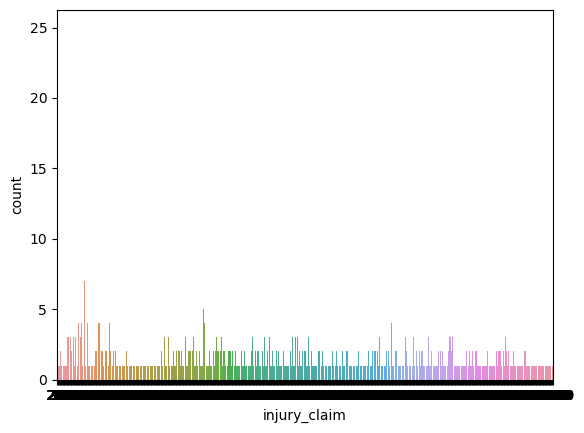

In [31]:
ux=sns.countplot(x='injury_claim',data=df)
print(df['injury_claim'].value_counts())
plt.show()

0        19
860       6
480       5
660       5
10000     5
         ..
3590      1
6480      1
4580      1
4920      1
7500      1
Name: property_claim, Length: 626, dtype: int64


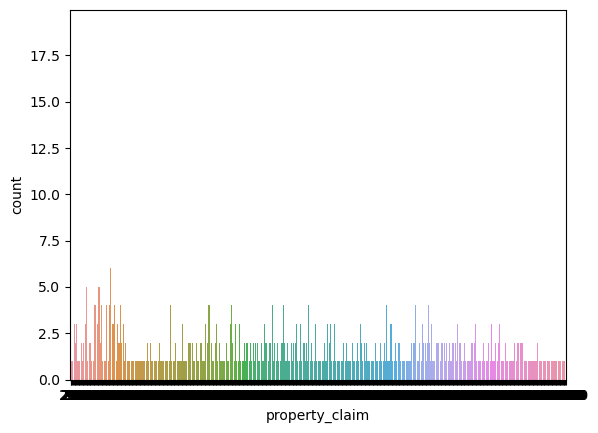

In [32]:
ux=sns.countplot(x='property_claim',data=df)
print(df['property_claim'].value_counts())
plt.show()

5040     7
3360     6
52080    5
4720     5
3600     5
        ..
43360    1
25130    1
38940    1
47430    1
52500    1
Name: vehicle_claim, Length: 726, dtype: int64


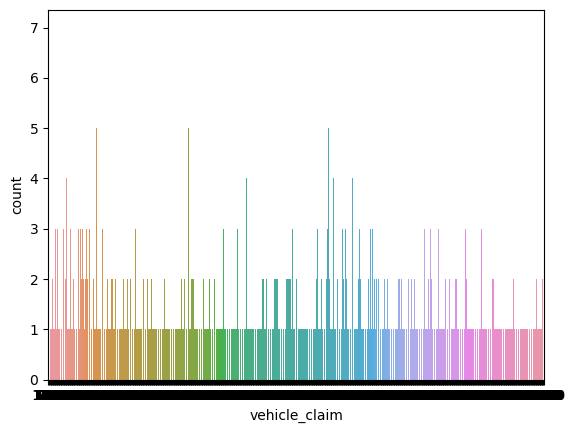

In [33]:
ux=sns.countplot(x='vehicle_claim',data=df)
print(df['vehicle_claim'].value_counts())
plt.show()

10.0    80
4.0     80
11.0    80
9.0     78
3.0     76
5.0     72
2.0     72
12.0    70
1.0     69
0.0     68
13.0    68
7.0     67
8.0     65
6.0     55
Name: auto_make, dtype: int64


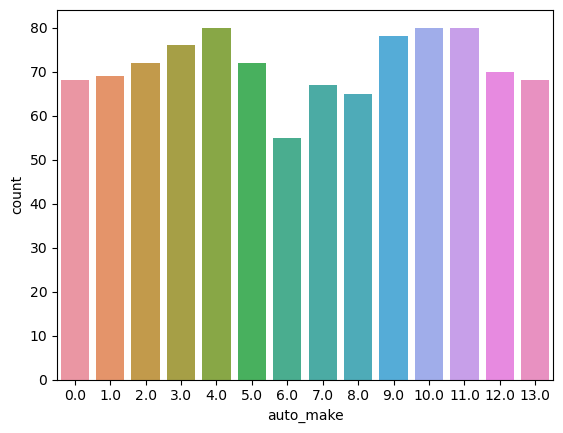

In [34]:
ux=sns.countplot(x='auto_make',data=df)
print(df['auto_make'].value_counts())
plt.show()

30.0    43
36.0    42
4.0     37
27.0    37
23.0    36
20.0    35
28.0    33
5.0     32
21.0    32
29.0    31
25.0    30
1.0     28
9.0     28
15.0    28
14.0    27
3.0     27
12.0    27
2.0     25
17.0    25
13.0    24
34.0    24
26.0    24
35.0    23
37.0    23
18.0    22
10.0    22
32.0    22
16.0    21
24.0    20
19.0    20
11.0    20
33.0    20
8.0     20
7.0     18
0.0     18
38.0    16
22.0    15
6.0     13
31.0    12
Name: auto_model, dtype: int64


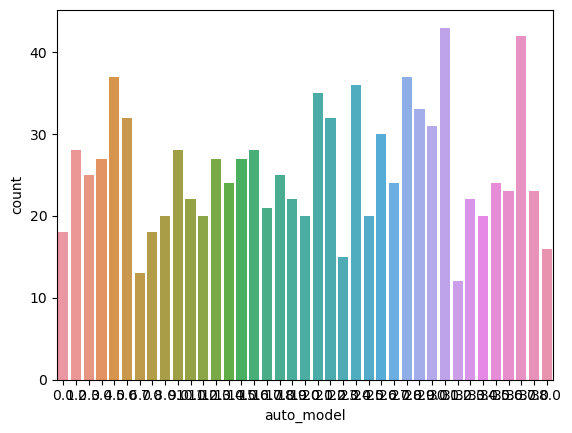

In [35]:
ux=sns.countplot(x='auto_model',data=df)
print(df['auto_model'].value_counts())
plt.show()

1995    56
1999    55
2005    54
2006    53
2011    53
2007    52
2003    51
2009    50
2010    50
2013    49
2002    49
2015    47
1997    46
2012    46
2008    45
2014    44
2001    42
2000    42
1998    40
2004    39
1996    37
Name: auto_year, dtype: int64


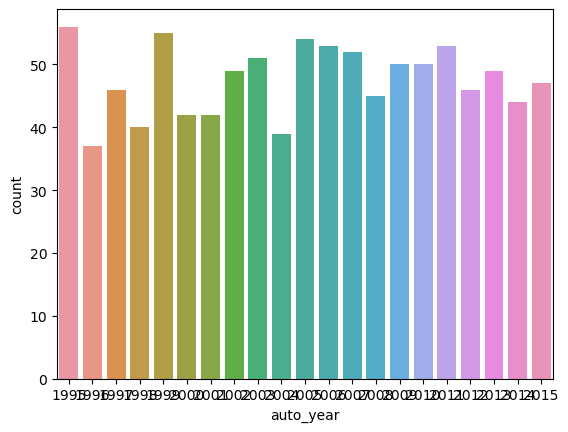

In [36]:
ux=sns.countplot(x='auto_year',data=df)
print(df['auto_year'].value_counts())
plt.show()

Here we are checking outliers in the data.

months_as_customer                Axes(0.125,0.747241;0.0824468x0.132759)
age                            Axes(0.223936,0.747241;0.0824468x0.132759)
policy_number                  Axes(0.322872,0.747241;0.0824468x0.132759)
policy_bind_date               Axes(0.421809,0.747241;0.0824468x0.132759)
policy_state                   Axes(0.520745,0.747241;0.0824468x0.132759)
policy_csl                     Axes(0.619681,0.747241;0.0824468x0.132759)
policy_deductable              Axes(0.718617,0.747241;0.0824468x0.132759)
policy_annual_premium          Axes(0.817553,0.747241;0.0824468x0.132759)
umbrella_limit                    Axes(0.125,0.587931;0.0824468x0.132759)
insured_zip                    Axes(0.223936,0.587931;0.0824468x0.132759)
insured_sex                    Axes(0.322872,0.587931;0.0824468x0.132759)
insured_education_level        Axes(0.421809,0.587931;0.0824468x0.132759)
insured_occupation             Axes(0.520745,0.587931;0.0824468x0.132759)
insured_hobbies                Axes(0.

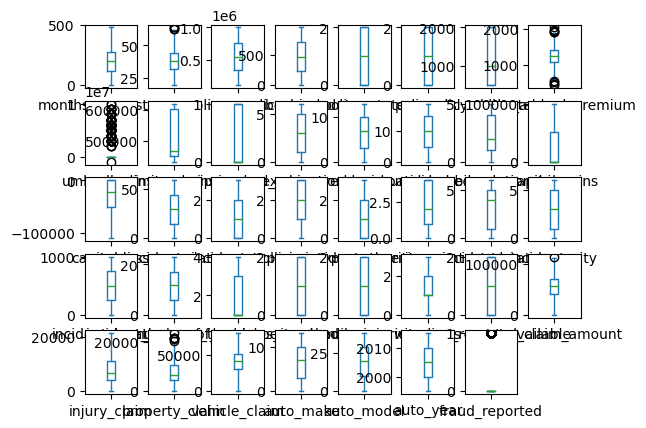

In [37]:
df.plot(kind='box',subplots=True,layout=(5,8))

As you can see outliers are present in this dataset to remove the outliers we use Zscore method to remove the outlier

In [38]:
from scipy.stats import zscore
out_features=df[['age','policy_annual_premium','umbrella_limit','total_claim_amount','property_claim']]
z=np.abs(zscore(out_features))
z

,age,policy_annual_premium,umbrella_limit,total_claim_amount,property_claim
0,0.990836,0.616705,0.479476,0.714257,1.165505
1,0.334073,0.242521,1.697980,1.807312,1.372696
2,1.088913,0.642233,1.697980,0.686362,0.736072
3,0.224613,0.652886,2.133471,0.403135,0.219722
4,0.552994,1.341980,2.133471,1.753121,1.399654
...,...,...,...,...,...
995,0.103769,0.222884,0.479476,1.305049,0.273817
996,0.224613,0.739141,0.479476,2.111466,2.214794
997,0.541611,0.520739,0.826998,0.558507,0.020826
998,2.523284,0.411866,1.697980,0.219110,0.451976


In [39]:
threshold=3
np.where(z>3)

(array([ 31,  48,  88, 115, 119, 229, 248, 262, 314, 430, 458, 500, 503,
        657, 700, 763, 875, 922, 975], dtype=int64),
 array([2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 4, 2, 2, 2, 1, 2, 2, 2],
       dtype=int64))

In [40]:
df1=df[(z<3).all(axis=1)]

In [41]:
df1.shape

(981, 39)

In [42]:
print('old dataframe:',df.shape[0])
print('new dataframe:',df1.shape[0])

old dataframe: 1000
new dataframe: 981


In [43]:
print('datalosspercentage:',((df.shape[0]-df1.shape[0])/df.shape[0])*100)

datalosspercentage: 1.9


As we can see there is less than 10% of data loss after removing the outliers so it is considerable.

Checking Skewness

In [44]:
df.skew()

months_as_customer             0.362177
age                            0.478988
policy_number                  0.038991
policy_bind_date               0.005194
policy_state                  -0.026177
policy_csl                     0.088928
policy_deductable              0.477887
policy_annual_premium          0.004402
umbrella_limit                 1.806712
insured_zip                    0.816554
insured_sex                    0.148630
insured_education_level       -0.000148
insured_occupation            -0.058881
insured_hobbies               -0.061563
insured_relationship           0.077488
capital-gains                  0.478850
capital-loss                  -0.391472
incident_date                  0.004756
incident_type                  0.101507
collision_type                -0.193345
incident_severity              0.279016
authorities_contacted         -0.121744
incident_state                -0.148865
incident_city                  0.049531
incident_location              0.000000


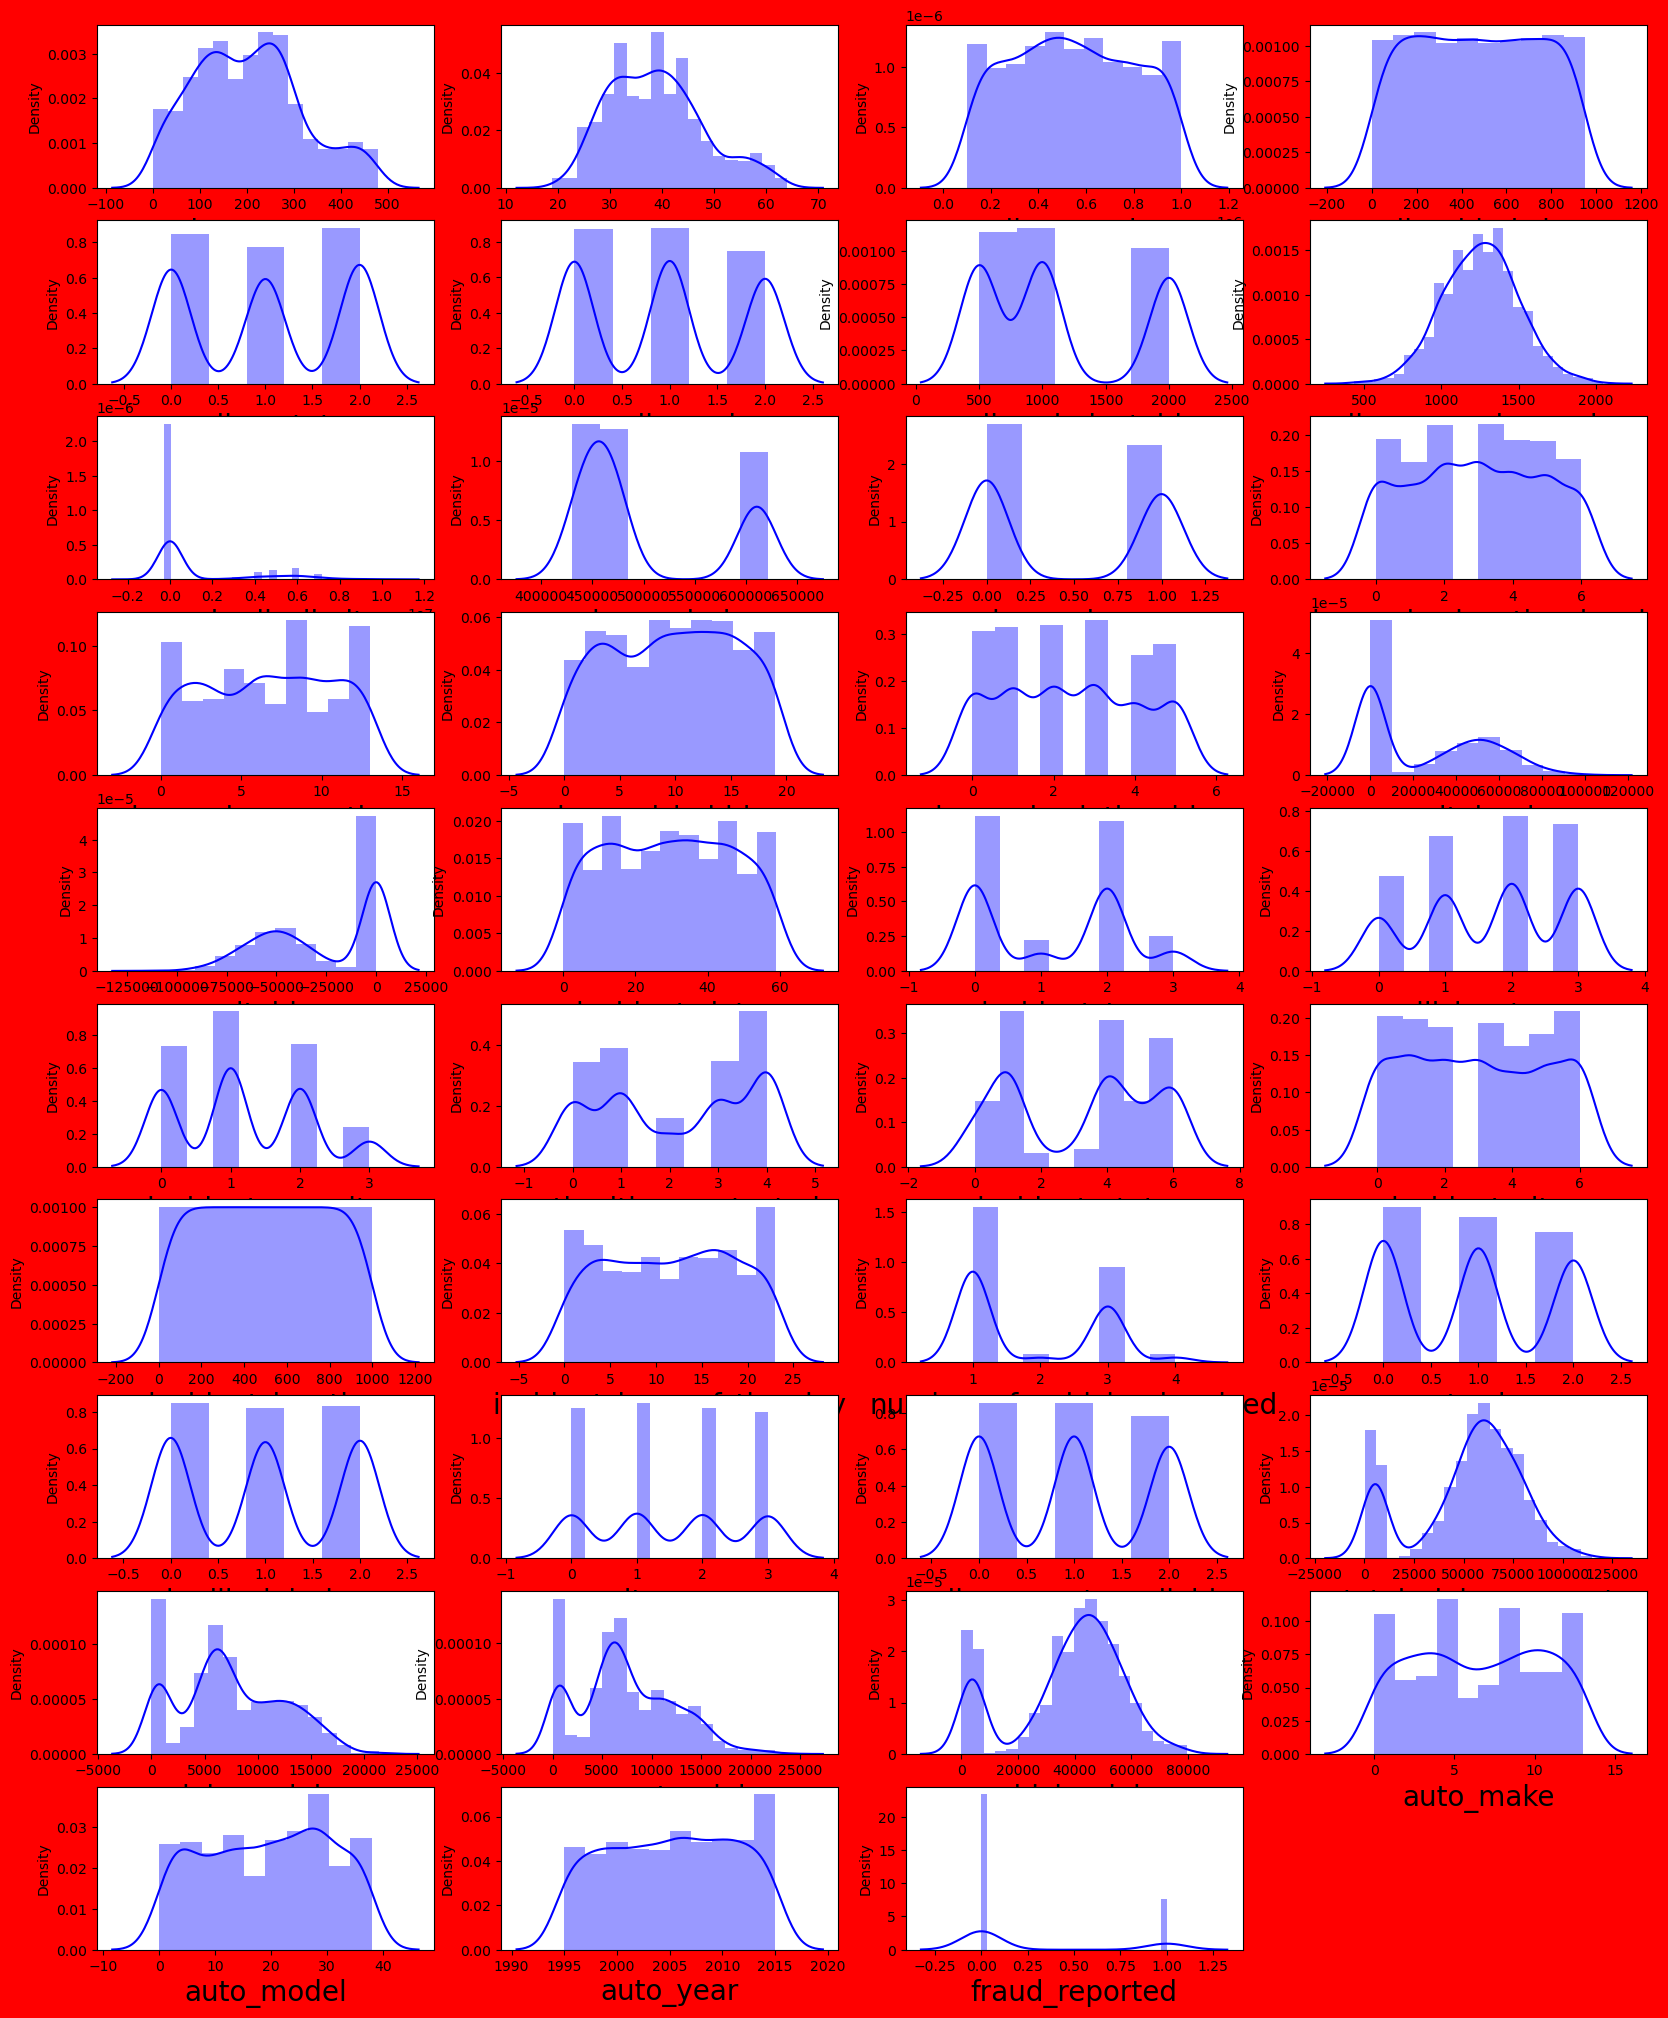

In [45]:
plt.figure(figsize=(20,25),facecolor='red')
num=1
for column in df:
    if num<=40:
        ax=plt.subplot(10,4,num)
        sns.distplot(df[column],color='b')
        plt.xlabel(column,fontsize=20)
        
    num+=1
plt.show()

skewness more than+/- 0.5 will we treated

object columns will no be treated

In [46]:
df['umbrella_limit']=np.sqrt(df['umbrella_limit'])

In [47]:
df['insured_zip']=np.sqrt(df['insured_zip'])

In [48]:
df.skew()

months_as_customer             0.362177
age                            0.478988
policy_number                  0.038991
policy_bind_date               0.005194
policy_state                  -0.026177
policy_csl                     0.088928
policy_deductable              0.477887
policy_annual_premium          0.004402
umbrella_limit                 1.578304
insured_zip                    0.800369
insured_sex                    0.148630
insured_education_level       -0.000148
insured_occupation            -0.058881
insured_hobbies               -0.061563
insured_relationship           0.077488
capital-gains                  0.478850
capital-loss                  -0.391472
incident_date                  0.004756
incident_type                  0.101507
collision_type                -0.193345
incident_severity              0.279016
authorities_contacted         -0.121744
incident_state                -0.148865
incident_city                  0.049531
incident_location              0.000000


In [49]:
df['umbrella_limit']=np.cbrt(df['umbrella_limit'])

In [50]:
df['insured_zip']=np.cbrt(df['insured_zip'])

In [51]:
df.skew()

months_as_customer             0.362177
age                            0.478988
policy_number                  0.038991
policy_bind_date               0.005194
policy_state                  -0.026177
policy_csl                     0.088928
policy_deductable              0.477887
policy_annual_premium          0.004402
umbrella_limit                 1.503182
insured_zip                    0.788599
insured_sex                    0.148630
insured_education_level       -0.000148
insured_occupation            -0.058881
insured_hobbies               -0.061563
insured_relationship           0.077488
capital-gains                  0.478850
capital-loss                  -0.391472
incident_date                  0.004756
incident_type                  0.101507
collision_type                -0.193345
incident_severity              0.279016
authorities_contacted         -0.121744
incident_state                -0.148865
incident_city                  0.049531
incident_location              0.000000


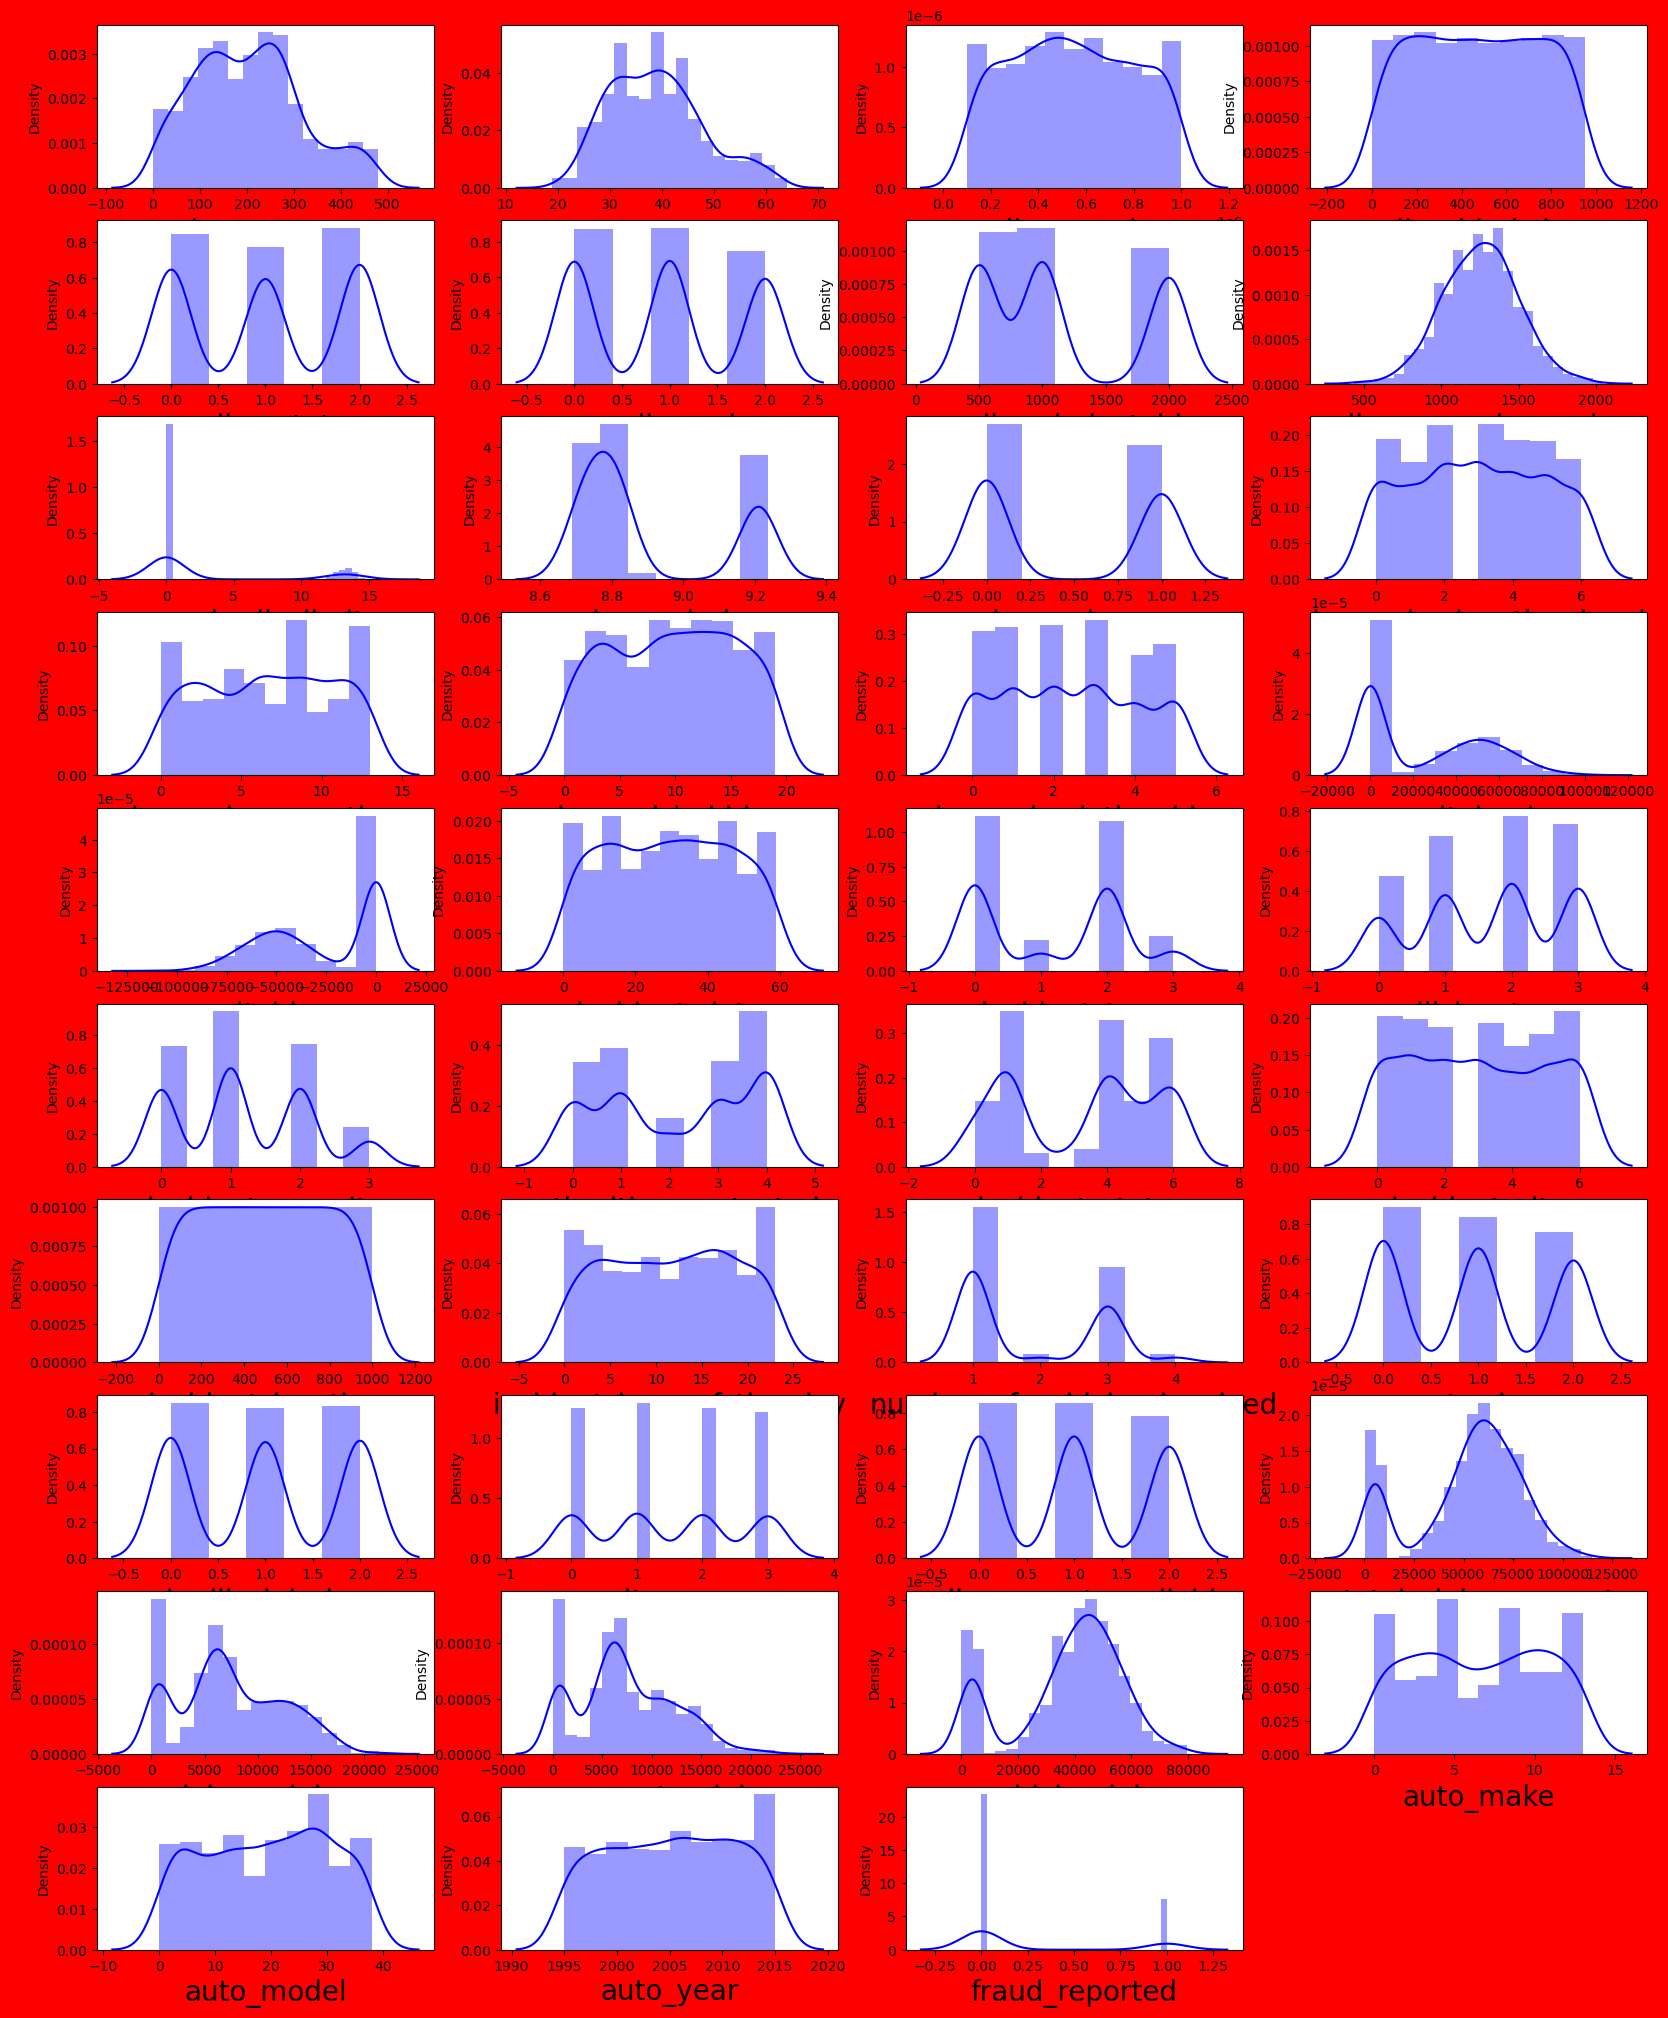

In [52]:
plt.figure(figsize=(20,25),facecolor='red')
num=1
for column in df:
    if num<=40:
        ax=plt.subplot(10,4,num)
        sns.distplot(df[column],color='b')
        plt.xlabel(column,fontsize=20)
        
    num+=1
plt.show()

Checking the Correlation b/w Target variable and Independent variable.

In [53]:
df.corr()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
months_as_customer,1.000000,0.922098,0.057555,0.055055,-0.000328,-0.026819,0.026807,0.005018,0.006165,0.018395,...,0.058383,0.017647,0.062108,0.065329,0.034940,0.061013,0.047655,0.004202,-0.000292,0.020544
age,0.922098,1.000000,0.059413,0.056538,-0.014533,-0.015185,0.029188,0.014404,0.002481,0.025367,...,0.052359,0.014661,0.069863,0.075522,0.060898,0.062588,0.030410,0.017343,0.001354,0.012143
policy_number,0.057555,0.059413,1.000000,0.045713,0.072815,0.038917,-0.006738,0.022566,0.000204,0.007370,...,-0.012661,0.032019,-0.018009,-0.008762,-0.010678,-0.020184,0.023860,0.065240,-0.000183,-0.029443
policy_bind_date,0.055055,0.056538,0.045713,1.000000,0.015289,0.008486,-0.001721,-0.037733,-0.024862,-0.043143,...,-0.007004,-0.034920,0.015901,0.024160,0.008611,0.013784,-0.025955,0.000306,0.035067,0.060642
policy_state,-0.000328,-0.014533,0.072815,0.015289,1.000000,0.001027,0.010033,0.012455,-0.019089,0.009382,...,0.022960,0.071950,-0.006002,-0.046290,0.008406,0.001425,0.017124,-0.025253,0.002114,0.029432
policy_csl,-0.026819,-0.015185,0.038917,0.008486,0.001027,1.000000,0.003384,0.023978,0.015545,0.006793,...,0.071500,0.002424,-0.055758,-0.078818,-0.042216,-0.046791,-0.004701,0.047885,-0.033082,-0.037190
policy_deductable,0.026807,0.029188,-0.006738,-0.001721,0.010033,0.003384,1.000000,-0.003245,0.000523,0.003669,...,0.066639,0.030166,0.022839,0.039107,0.064792,0.005269,-0.035379,-0.003268,0.026105,0.014817
policy_annual_premium,0.005018,0.014404,0.022566,-0.037733,0.012455,0.023978,-0.003245,1.000000,-0.001823,0.032416,...,0.002332,0.013624,0.009094,-0.017633,-0.011654,0.020246,0.000045,-0.031849,-0.049226,-0.014480
umbrella_limit,0.006165,0.002481,0.000204,-0.024862,-0.019089,0.015545,0.000523,-0.001823,1.000000,0.008038,...,-0.010579,-0.057056,-0.036050,-0.042776,-0.017317,-0.034909,0.006191,0.030255,0.006679,0.059381
insured_zip,0.018395,0.025367,0.007370,-0.043143,0.009382,0.006793,0.003669,0.032416,0.008038,1.000000,...,0.020520,-0.018718,-0.033892,-0.017444,-0.007019,-0.041077,-0.021377,0.023542,-0.032877,0.021579


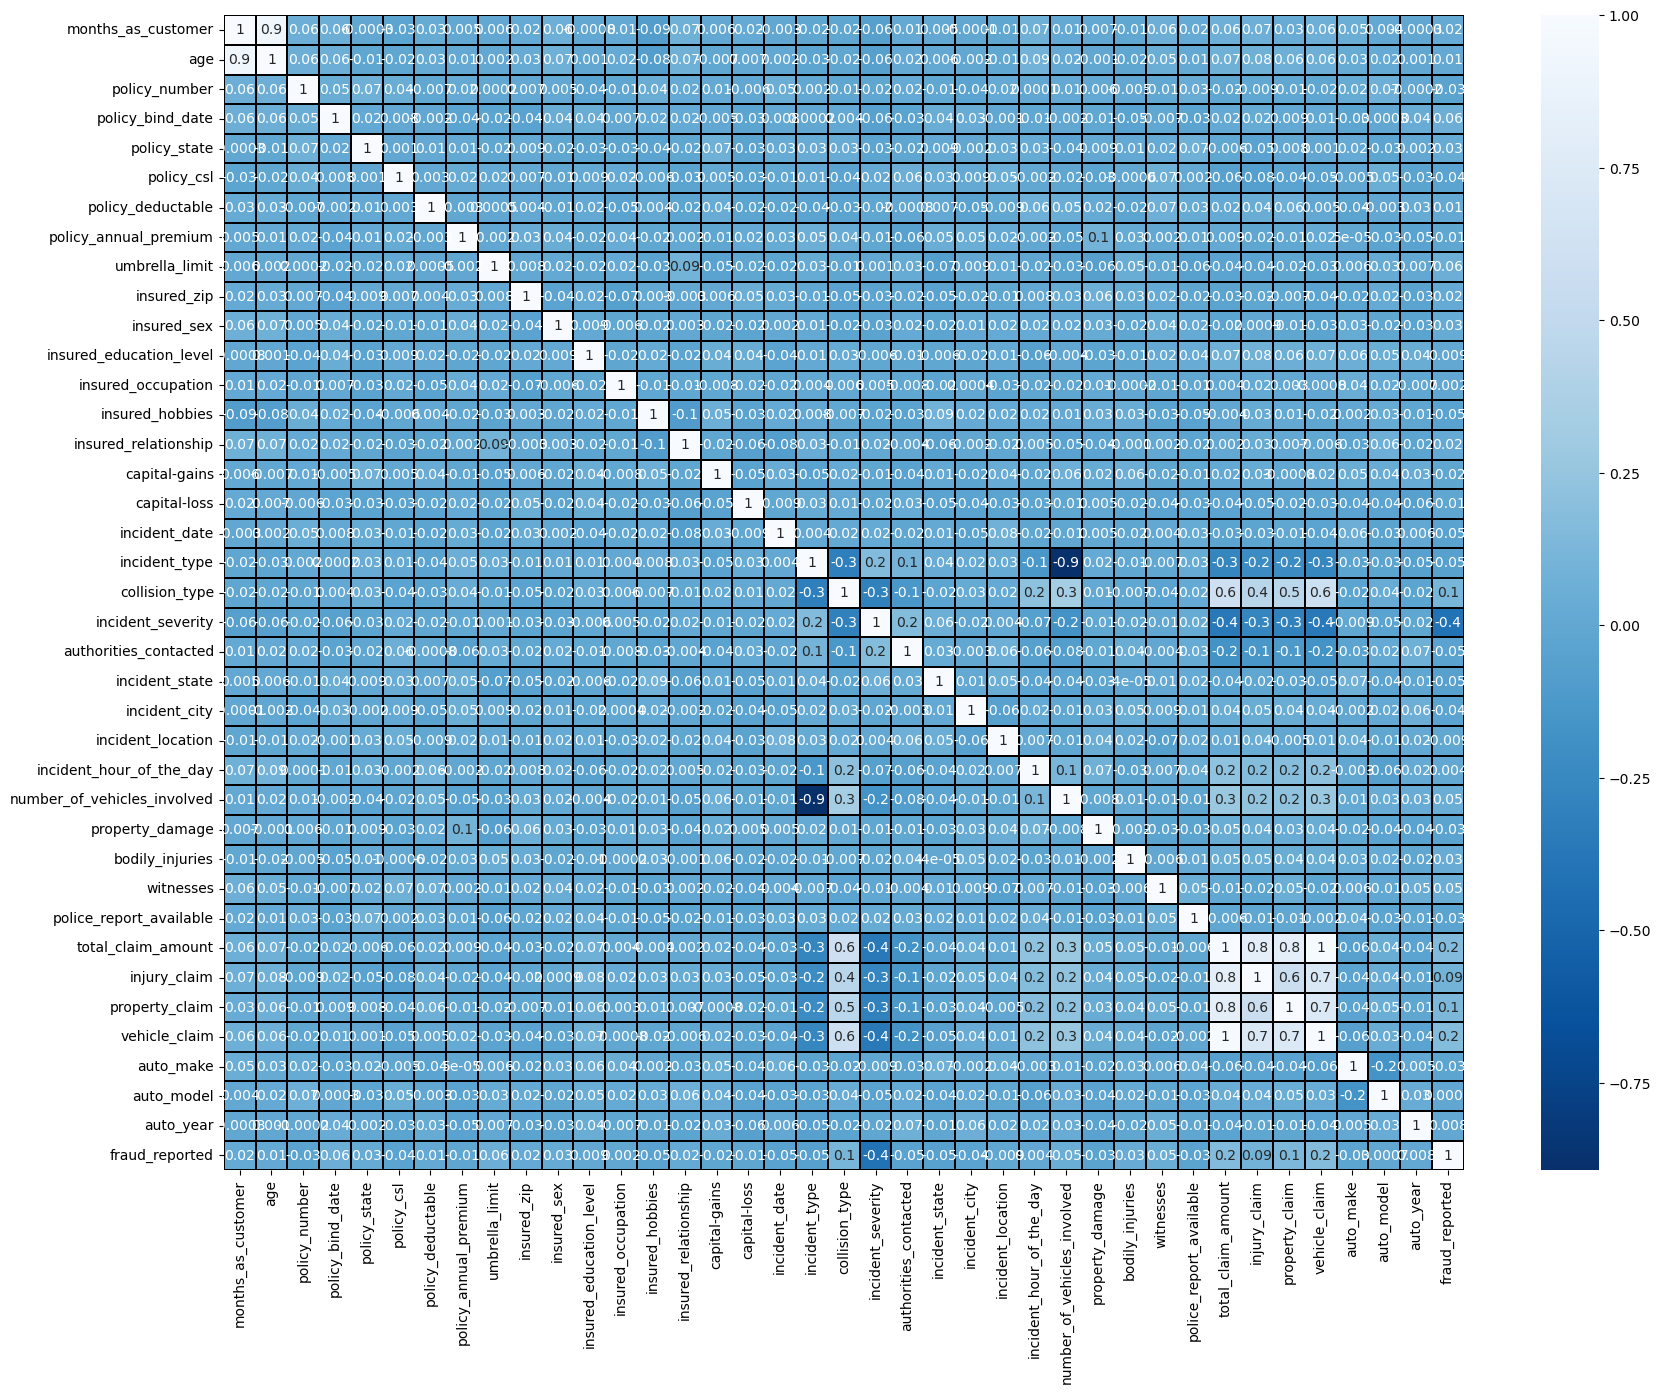

In [54]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(),linewidths=0.1,fmt='.1g',linecolor='black',annot=True,cmap='Blues_r')
plt.yticks(rotation=0)
plt.show()
                    

In [55]:
x=df1.drop(['fraud_reported'],axis=1)
y=df1['fraud_reported']

In [56]:
x.shape

(981, 38)

In [57]:
y.shape

(981,)

Feature scaling using StandardScaler method.

In [58]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)


In [59]:
x

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year
0,1.070264,0.983956,-0.094588,0.210552,1.180447,0.067197,-0.225968,0.619923,-0.467587,-0.483144,...,0.001248,0.464781,1.267282,0.717821,-0.188645,1.174939,0.753457,0.852973,-1.638317,-0.186701
1,0.202991,0.329985,-0.788948,1.257880,-0.024567,0.067197,1.410009,-0.248937,1.891997,-0.454490,...,-1.222563,-1.333838,-1.204296,-1.809969,-1.362026,-1.379994,-1.825887,0.356523,-0.650052,0.311903
2,-0.612245,-1.086951,0.550801,-1.043342,1.180447,-1.176582,1.410009,0.645737,1.891997,-0.980807,...,1.225058,1.364090,0.031493,-0.686254,0.055042,-0.739173,-0.785546,-0.636377,0.967110,0.311903
3,0.445828,0.220990,-1.235972,1.058562,-1.229581,0.067197,1.410009,0.656510,2.363914,1.507297,...,0.001248,0.464781,0.031493,0.405931,-0.223457,-0.219420,0.681233,-0.884602,1.326479,1.475311
4,0.202991,0.547975,-0.693421,-1.061462,-1.229581,1.310976,-0.225968,1.353331,2.363914,1.543591,...,-1.222563,-0.434529,0.031493,-1.755645,-1.255541,-1.407130,-1.770657,-1.629278,1.056952,0.644305
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
976,-1.748372,-0.105995,1.538248,0.047474,1.180447,1.310976,-0.225968,0.221687,-0.467587,-0.971597,...,-1.222563,-0.434529,-1.204296,1.310069,2.049585,0.277372,1.229284,-0.139927,-1.189106,0.145701
977,0.697337,0.220990,-1.394790,-1.249908,-1.229581,-1.176582,-0.225968,0.743732,-0.467587,1.508138,...,1.225058,1.364090,-1.204296,2.118476,2.180643,2.231144,1.828316,1.597649,0.787425,1.641513
978,-0.646936,-0.541976,1.447586,0.127201,1.180447,0.067197,-1.043957,0.522881,0.948164,-0.810270,...,1.225058,1.364090,1.267282,0.561686,0.014086,0.022714,0.775761,1.101198,-0.021156,-1.516311
979,2.197719,2.509887,-0.046586,0.359135,-1.229581,1.310976,1.410009,0.412787,1.891997,-0.825452,...,-1.222563,-0.434529,1.267282,-0.217849,-0.452809,-0.453205,-0.071806,-1.381053,-1.278948,-1.183908


In [60]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['vif values']=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif['features']=x.columns
vif

,vif values,features
0,6.898641,months_as_customer
1,6.920800,age
2,1.031470,policy_number
3,1.029921,policy_bind_date
4,1.036373,policy_state
5,1.032693,policy_csl
6,1.042067,policy_deductable
7,1.041216,policy_annual_premium
8,1.037994,umbrella_limit
9,1.038826,insured_zip


As we can seee there is multicorrelation present in the total_claim_amount.here has highly correlated and VIF value here is high so we can Drop this column.

In [62]:
x.drop('total_claim_amount',axis=1,inplace=True)

In [63]:
x.drop('injury_claim',axis=1,inplace=True)

In [64]:
x.drop('property_claim',axis=1,inplace=True)

In [65]:
x.drop('vehicle_claim',axis=1,inplace=True)

In [66]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['vif values']=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif['features']=x.columns
vif

,vif values,features
0,6.844804,months_as_customer
1,6.861246,age
2,1.031110,policy_number
3,1.029650,policy_bind_date
4,1.031435,policy_state
5,1.025549,policy_csl
6,1.029371,policy_deductable
7,1.037433,policy_annual_premium
8,1.035289,umbrella_limit
9,1.035575,insured_zip


In [67]:
y.value_counts()

0.0    741
1.0    240
Name: fraud_reported, dtype: int64

Here we can see that data is not balanced since it is a classification problem we will balance the data using Oversampling method.

OverSampling here we use SMOTE method.

In [68]:
import sklearn
!pip install imbalanced_learn
from imblearn.over_sampling import SMOTE
smt=SMOTE()


In [69]:
trainx,trainy=smt.fit_resample(x,y)

In [70]:
trainx.value_counts()

months_as_customer  age        policy_number  policy_bind_date  policy_state  policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  insured_zip  insured_sex  insured_education_level  insured_occupation  insured_hobbies  insured_relationship  capital-gains  capital-loss  incident_date  incident_type  collision_type  incident_severity  authorities_contacted  incident_state  incident_city  incident_location  incident_hour_of_the_day  number_of_vehicles_involved  property_damage  bodily_injuries  witnesses  police_report_available  auto_make  auto_model  auto_year
-1.774390           -0.759966   0.756020       0.261288          1.180447      1.310976   -0.225968           0.496155              -0.467587       -0.830372     1.072994    -1.003640                 1.332754           -1.712686         1.534662              1.290142      -0.510517      0.211702      -1.089093       0.313932       -0.195406          -1.409353              -1.038860        1.479529      -1.546470  

In [71]:
trainy.value_counts()

1.0    741
0.0    741
Name: fraud_reported, dtype: int64

In [72]:
trainy

0       1.0
1       1.0
2       0.0
3       1.0
4       0.0
       ... 
1477    1.0
1478    1.0
1479    1.0
1480    1.0
1481    1.0
Name: fraud_reported, Length: 1482, dtype: float64

<Axes: ylabel='count'>

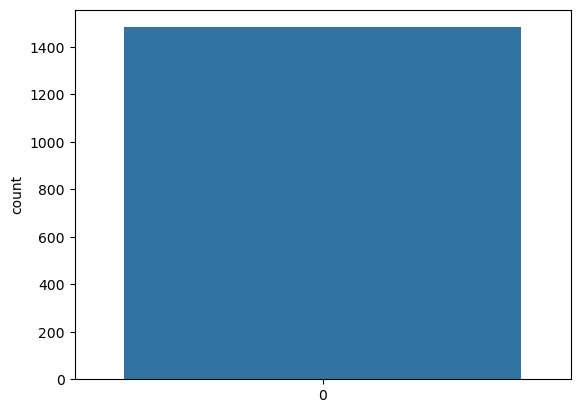

In [73]:
sns.countplot(trainy)

Model Bulding

As you can see this is Classification problem in this we have catgerocial data present so we use Classification model here


In [74]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error


In [75]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=0)

In [76]:
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
pred=rf.predict(x_test)
acc=accuracy_score(y_test,pred)
print(accuracy_score(y_test,pred))

0.7050847457627119


In [77]:
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier,BaggingClassifier
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,accuracy_score
from sklearn.model_selection import cross_val_score
RFC=RandomForestClassifier()
RFC.fit(x_train,y_train)
predRFC=RFC.predict(x_test)
print(accuracy_score(y_test,predRFC))
print(confusion_matrix(y_test,predRFC))
print(classification_report(y_test,predRFC))


0.7152542372881356
[[197  16]
 [ 68  14]]
              precision    recall  f1-score   support

         0.0       0.74      0.92      0.82       213
         1.0       0.47      0.17      0.25        82

    accuracy                           0.72       295
   macro avg       0.61      0.55      0.54       295
weighted avg       0.67      0.72      0.66       295



In [78]:
svc=SVC()
svc.fit(x_train,y_train)
predsvc=svc.predict(x_test)
print(accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))


0.7220338983050848
[[212   1]
 [ 81   1]]
              precision    recall  f1-score   support

         0.0       0.72      1.00      0.84       213
         1.0       0.50      0.01      0.02        82

    accuracy                           0.72       295
   macro avg       0.61      0.50      0.43       295
weighted avg       0.66      0.72      0.61       295



In [79]:
ac=AdaBoostClassifier()
ac.fit(x_train,y_train)
predac=ac.predict(x_test)
print(accuracy_score(y_test,predac))
print(confusion_matrix(y_test,predac))
print(classification_report(y_test,predac))

0.7762711864406779
[[196  17]
 [ 49  33]]
              precision    recall  f1-score   support

         0.0       0.80      0.92      0.86       213
         1.0       0.66      0.40      0.50        82

    accuracy                           0.78       295
   macro avg       0.73      0.66      0.68       295
weighted avg       0.76      0.78      0.76       295



In [80]:
bc=BaggingClassifier()
bc.fit(x_train,y_train)
predbc=bc.predict(x_test)
print(accuracy_score(y_test,predbc))
print(confusion_matrix(y_test,predbc))
print(classification_report(y_test,predbc))


0.7864406779661017
[[190  23]
 [ 40  42]]
              precision    recall  f1-score   support

         0.0       0.83      0.89      0.86       213
         1.0       0.65      0.51      0.57        82

    accuracy                           0.79       295
   macro avg       0.74      0.70      0.71       295
weighted avg       0.78      0.79      0.78       295



In [81]:
et=ExtraTreesClassifier()
et.fit(x_train,y_train)
predet=et.predict(x_test)
print(accuracy_score(y_test,predet))
print(confusion_matrix(y_test,predet))
print(classification_report(y_test,predet))


0.7016949152542373
[[203  10]
 [ 78   4]]
              precision    recall  f1-score   support

         0.0       0.72      0.95      0.82       213
         1.0       0.29      0.05      0.08        82

    accuracy                           0.70       295
   macro avg       0.50      0.50      0.45       295
weighted avg       0.60      0.70      0.62       295



In [82]:
from sklearn.tree import DecisionTreeClassifier
dc= DecisionTreeClassifier()
dc.fit(x_train,y_train)
preddc=dc.predict(x_test)
print(accuracy_score(y_test,preddc))
print(confusion_matrix(y_test,preddc))
print(classification_report(y_test,preddc))


0.7796610169491526
[[178  35]
 [ 30  52]]
              precision    recall  f1-score   support

         0.0       0.86      0.84      0.85       213
         1.0       0.60      0.63      0.62        82

    accuracy                           0.78       295
   macro avg       0.73      0.73      0.73       295
weighted avg       0.78      0.78      0.78       295



Now we can check cross valdiation of all the model

In [83]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(RFC,x,y)
print(score)
print(score.mean())
print('difference b/w Accuracy_score and cross_val_score is:',accuracy_score(y_test,predRFC)-score.mean())

[0.78680203 0.79081633 0.76020408 0.77040816 0.77040816]
0.775727753030146
difference b/w Accuracy_score and cross_val_score is: -0.06047351574201032


In [84]:
score=cross_val_score(ac,x,y)
print(score)
print(score.mean())
print('difference b/w Accuracy_score and cross_val_score is:',accuracy_score(y_test,predac)-score.mean())

[0.78172589 0.7755102  0.76530612 0.80102041 0.82142857]
0.7889982388894644
difference b/w Accuracy_score and cross_val_score is: -0.012727052448786469


In [85]:
score=cross_val_score(bc,x,y)
print(score)
print(score.mean())
print('difference b/w Accuracy_score and cross_val_score is:',accuracy_score(y_test,predbc)-score.mean())



[0.81218274 0.82142857 0.81122449 0.84183673 0.83673469]
0.8246814461825339
difference b/w Accuracy_score and cross_val_score is: -0.038240768216432186


In [86]:
score=cross_val_score(svc,x,y)
print(score)
print(score.mean())
print('difference b/w Accuracy_score and cross_val_score is:',accuracy_score(y_test,predsvc)-score.mean())

[0.76142132 0.75       0.73979592 0.76020408 0.76020408]
0.7543250802859214
difference b/w Accuracy_score and cross_val_score is: -0.03229118198083658


In [87]:
score=cross_val_score(et,x,y)
print(score)
print(score.mean())
print('difference b/w Accuracy_score and cross_val_score is:',accuracy_score(y_test,predet)-score.mean())

[0.78172589 0.74489796 0.76020408 0.78571429 0.77040816]
0.7685900756241584
difference b/w Accuracy_score and cross_val_score is: -0.06689516036992105


In [89]:
score=cross_val_score(dc,x,y)
print(score)
print(score.mean())
print('difference b/w Accuracy_score and cross_val_score is:',accuracy_score(y_test,predet)-score.mean())

[0.75126904 0.78571429 0.73469388 0.81632653 0.81122449]
0.7798456438412928
difference b/w Accuracy_score and cross_val_score is: -0.07815072858705552


As we can see above all model Accuracy_score and crossval_score is less and score mean is 78% in AdaBoostClassifier() model so this is the best model.

Hyper parameter tunning

In [100]:
from sklearn.model_selection import GridSearchCV
param={'algorithm':['SAMME', 'SAMME.R']}
gscv=GridSearchCV(AdaBoostClassifier(),param,cv=5)
gscv.fit(x_train,y_train)
gscv.best_params_

{'algorithm': 'SAMME'}

In [101]:
model=AdaBoostClassifier(algorithm='SAMME')
model.fit(x_train,y_train)
pred=model.predict(x_test)
acc=accuracy_score(y_test,pred)
print(acc*100)

76.94915254237287


Plotting Roc and AUC curve

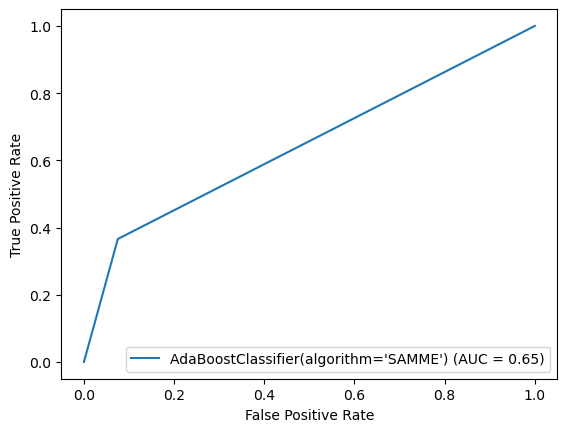

In [105]:
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
fpr,tpr,thresholds =roc_curve(y_test,pred,pos_label=1)
roc_auc=metrics.auc(fpr,tpr)
display=metrics.RocCurveDisplay(fpr=fpr,tpr=tpr,roc_auc=roc_auc,estimator_name=model)
display.plot()

Save the model

In [106]:
import joblib
model=joblib.dump(model,'Insurance Claim Fraud Detection')

In [107]:
import joblib
model=joblib.load('Insurance Claim Fraud Detection')
prediction=model.predict(x_test)
prediction

array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0.,
       1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 1., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1.,
       0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 1., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0.,
       0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

Conclusion

In [108]:
a=np.array(y_test)
df=pd.DataFrame()
df['prediction']=prediction
df['original']=a
df

,prediction,original
0,0.0,0.0
1,0.0,0.0
2,0.0,1.0
3,0.0,1.0
4,0.0,0.0
...,...,...
290,0.0,0.0
291,0.0,0.0
292,0.0,0.0
293,0.0,0.0
